# Plotting wind flags and vorticity field

This is one cell notebook example that will help you plot wind flags together with vorticity using Magics.

At ECMWF  

#### From your workstation:
module swap (or load) Magics/new   
jupyter notebook  

load this notebook

List of all **mwind** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Wind+Plotting "Wind parameters").

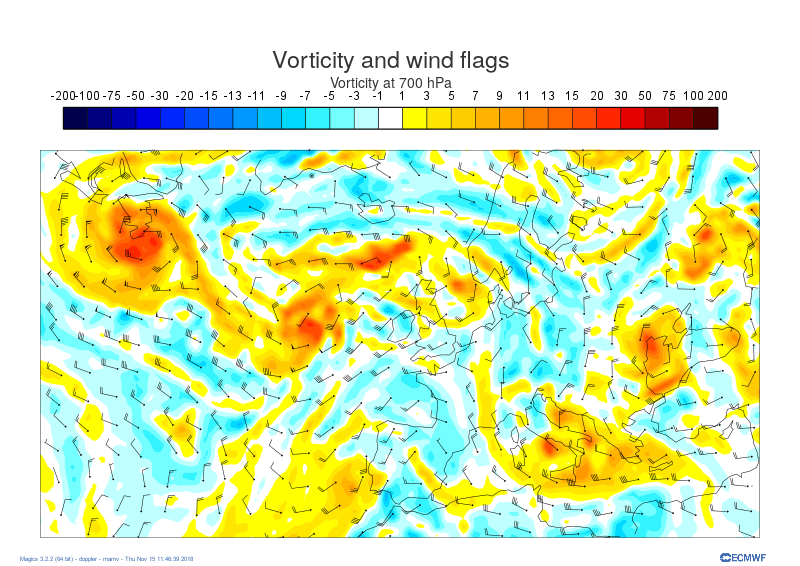

In [33]:
import Magics.macro as magics

europe = magics.mmap(
    subpage_clipping              = "on",
    subpage_lower_left_latitude   = 21.51,
    subpage_lower_left_longitude  = -37.27,
    subpage_upper_right_latitude  = 51.28,
    subpage_upper_right_longitude = 65.0,
    subpage_map_projection        = "polar_stereographic")

#Background Coastlines 
foreground = magics.mcoast({"map_coastline_colour"     : "black",
                            "map_coastline_land_shade" : "off",
                            "map_coastline_sea_shade"  : "off",
                            "map_grid"                 : "off",
                            "map_label"                : "off"})

#Import the  wind
uv700 = magics.mgrib( 
    grib_input_file_name = 'ghtuv.grib',
    grib_wind_position_1 = 7,
    grib_wind_position_2 = 8)

# Define wind flags plotting
uv700_wind = magics.mwind(
    legend = 'off',
    wind_arrow_unit_system       = "automatic",
    wind_arrow_unit_velocity     = 10.0,
    wind_field_type              = "Flags",
    wind_flag_colour             = "black",
    wind_flag_length             = 0.6,
    wind_flag_origin_marker      = "dot",
    wind_flag_origin_marker_size = 0.1,
    wind_thinning_factor         = 1.,
    wind_thinning_method         = "automatic")

title = magics.mtext( 
    text_lines          = ["<font size='1'>Vorticity and wind flags</font>",
                           "Vorticity at 700 hPa"],
    text_mode           = 'positional',
    text_box_x_position = 1.0,
    text_box_y_position = 17.5,
    text_box_x_length   = 27.0,
    text_box_y_length   = 2.3,
    text_justification  = 'center',
    text_font_size      = 0.6,
    text_colour         = 'charcoal')

#Import the  vorticity
vo700 = magics.mgrib( 
    grib_input_file_name = 'vorticity.grib',
    grib_field_position  = 2)

# Vorticity contour
vo700_contour = magics.mcont({
                    "legend"                      : "on", 
                    "contour"                     : "off",
                    "contour_highlight"           : "off",
                    "contour_hilo"                : "off",
                    "contour_label"               : "off",
                    "contour_legend_text"         : "Contour shade (MORE CONTOURS) Range: -200 / 200",
                    "contour_level_list"          : [-200.0, -100.0, -75.0, -50.0, -30.0, -20.0,
                                                     -15.0, -13.0, -11.0, -9.0, -7.0, -5.0, -3.0, 
                                                     -1.0, 1.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0, 
                                                     15.0, 20.0, 30.0, 50.0, 75.0, 100.0, 200.0],
                    "contour_level_selection_type": "level_list",
                    "contour_shade"               : "on",
                    "contour_shade_colour_list"   : ["rgb(0,0,0.3)","rgb(0,0,0.5)","rgb(0,0,0.7)",
                                                     "rgb(0,0,0.9)","rgb(0,0.15,1)","rgb(0,0.3,1)",
                                                     "rgb(0,0.45,1)","rgb(0,0.6,1)","rgb(0,0.75,1)",
                                                     "rgb(0,0.85,1)","rgb(0.2,0.95,1)","rgb(0.45,1,1)",
                                                     "rgb(0.75,1,1)","none","rgb(1,1,0)","rgb(1,0.9,0)",
                                                     "rgb(1,0.8,0)","rgb(1,0.7,0)","rgb(1,0.6,0)",
                                                     "rgb(1,0.5,0)","rgb(1,0.4,0)","rgb(1,0.3,0)",
                                                     "rgb(1,0.15,0)","rgb(0.9,0,0)","rgb(0.7,0,0)",
                                                     "rgb(0.5,0,0)","rgb(0.3,0,0)"],
                    "contour_shade_colour_method" : "list",
                    "contour_shade_method"        : "area_fill"}) 

# Defining the legend
vo700_legend = magics.mlegend(
    legend_box_mode       = 'positional',
    legend_box_x_position = 1.0,
    legend_box_y_position = 16.0,
    legend_box_x_length   = 27.0,
    legend_box_y_length   = 1.5,
    legend_text_colour    = 'black',
    legend_border         = 'off',
    legend_border_colour  = 'black',
    legend_box_blanking   = 'on',
    legend_display_type   = 'continuous',
    legend_text_font_size = 0.5)

#To the plot
magics.plot(europe, vo700, vo700_contour, vo700_legend, uv700, uv700_wind, foreground, title)
